In [17]:
#Las graficas se muestren en el mismo notebook 
%matplotlib inline

# Importar la librería NumPy
import numpy as np
# Importar la librería Pandas desde Python.
import pandas as pd
#Stats
from scipy.stats import stats

import matplotlib.pyplot as plt
from copy import deepcopy

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

#Tipo de imagenes
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [18]:
# Importar datos en formato xls.
data_financiera = pd.read_csv('TEST_X003.csv')

In [19]:
data_financiera.head()

,IDENTIFICADOR,INGRESO_BRUTO_FINAL,EDAD,TIPO_CLIENTE,LINEA_TC_SF_M1,SALDO_TC_SF_M1,SALDO_PP_SF_M1,SALDO_VEH_SF_M1,SALDO_HIP_SF_M1,SALDO_CONV_SF_M1
0,11689996,1383.0,35,INDEPENDIENTE,NaN,NaN,NaN,NaN,NaN,NaN
1,12073740,1702.0,56,DEPENDIENTE,1177.85,738.72,5270.87,0.0,0.00,0.0
2,8823281,1194.0,41,INDEPENDIENTE,0.00,0.00,0.00,0.0,0.00,0.0
3,8500942,2157.0,56,DEPENDIENTE,13400.00,2164.80,0.00,0.0,5512.52,0.0
4,12756072,1626.0,28,INDEPENDIENTE,2800.00,1744.73,0.00,0.0,0.00,0.0


In [20]:
data_financiera.describe()

,IDENTIFICADOR,INGRESO_BRUTO_FINAL,EDAD,LINEA_TC_SF_M1,SALDO_TC_SF_M1,SALDO_PP_SF_M1,SALDO_VEH_SF_M1,SALDO_HIP_SF_M1,SALDO_CONV_SF_M1
count,1.000000e+04,10000.000000,10000.00000,8690.000000,8690.000000,8690.000000,8690.000000,8.690000e+03,8690.000000
mean,1.151724e+07,2385.633285,41.18730,13516.844390,3966.027094,2613.659409,535.053659,7.777989e+03,2455.045290
std,2.438010e+06,3618.207912,14.39137,33869.488489,13520.376876,13931.186008,5842.939381,5.929781e+04,9944.825259
min,3.757400e+04,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,9.904324e+06,741.000000,30.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,1.199306e+07,1460.770000,39.00000,505.200000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,1.351367e+07,2667.214286,51.00000,10912.745000,1639.062500,0.000000,0.000000,0.000000e+00,0.000000
max,1.453706e+07,88394.000000,115.00000,544618.230000,275315.360000,413682.650000,298578.200000,1.803554e+06,134649.830000


In [21]:
#Validar cuantos nulos tenemos por cada variable
for var in data_financiera:
    print(var,sum(data_financiera[var].isnull()))

IDENTIFICADOR 0
INGRESO_BRUTO_FINAL 0
EDAD 0
TIPO_CLIENTE 0
LINEA_TC_SF_M1 1310
SALDO_TC_SF_M1 1310
SALDO_PP_SF_M1 1310
SALDO_VEH_SF_M1 1310
SALDO_HIP_SF_M1 1310
SALDO_CONV_SF_M1 1310


In [22]:
#Cantidad de registros quitando nulls
data_financiera['LINEA_TC_SF_M1'].count()

8690

In [23]:
#Nos quedamos con los registros sin nulos
data_financiera1 = data_financiera[data_financiera['LINEA_TC_SF_M1'].isnull()==False]

In [24]:
#Validamos que no existan mas nulos 
for var in data_financiera1:
    print(var,sum(data_financiera1[var].isnull()))

IDENTIFICADOR 0
INGRESO_BRUTO_FINAL 0
EDAD 0
TIPO_CLIENTE 0
LINEA_TC_SF_M1 0
SALDO_TC_SF_M1 0
SALDO_PP_SF_M1 0
SALDO_VEH_SF_M1 0
SALDO_HIP_SF_M1 0
SALDO_CONV_SF_M1 0


In [25]:
data_financiera1.describe()

,IDENTIFICADOR,INGRESO_BRUTO_FINAL,EDAD,LINEA_TC_SF_M1,SALDO_TC_SF_M1,SALDO_PP_SF_M1,SALDO_VEH_SF_M1,SALDO_HIP_SF_M1,SALDO_CONV_SF_M1
count,8.690000e+03,8690.000000,8690.000000,8690.000000,8690.000000,8690.000000,8690.000000,8.690000e+03,8690.000000
mean,1.133217e+07,2598.421271,42.027963,13516.844390,3966.027094,2613.659409,535.053659,7.777989e+03,2455.045290
std,2.444240e+06,3765.880321,13.404823,33869.488489,13520.376876,13931.186008,5842.939381,5.929781e+04,9944.825259
min,3.757400e+04,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,9.741461e+06,787.250000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,1.164291e+07,1553.000000,40.000000,505.200000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,1.334594e+07,2821.000000,51.000000,10912.745000,1639.062500,0.000000,0.000000,0.000000e+00,0.000000
max,1.453706e+07,88394.000000,99.000000,544618.230000,275315.360000,413682.650000,298578.200000,1.803554e+06,134649.830000


In [33]:
data_financiera1.head()

,IDENTIFICADOR,INGRESO_BRUTO_FINAL,EDAD,TIPO_CLIENTE,LINEA_TC_SF_M1,SALDO_TC_SF_M1,SALDO_PP_SF_M1,SALDO_VEH_SF_M1,SALDO_HIP_SF_M1,SALDO_CONV_SF_M1,Deudas
1,12073740,1702.0,56,DEPENDIENTE,1177.85,738.72,5270.87,0.0,0.00,0.0,6009.59
2,8823281,1194.0,41,INDEPENDIENTE,0.00,0.00,0.00,0.0,0.00,0.0,0.00
3,8500942,2157.0,56,DEPENDIENTE,13400.00,2164.80,0.00,0.0,5512.52,0.0,7677.32
4,12756072,1626.0,28,INDEPENDIENTE,2800.00,1744.73,0.00,0.0,0.00,0.0,1744.73
5,14196367,1516.0,48,INDEPENDIENTE,0.00,0.00,0.00,0.0,0.00,0.0,0.00


In [32]:
#Calculamos deuda total de todos los productos
data_financiera1['Deudas'] =data_financiera1[['SALDO_TC_SF_M1','SALDO_PP_SF_M1','SALDO_VEH_SF_M1','SALDO_HIP_SF_M1','SALDO_CONV_SF_M1']].sum(axis=1)

print(data_financiera1['Deudas'])

1         6009.59
2            0.00
3         7677.32
4         1744.73
5            0.00
6            0.00
8            0.00
9         3765.81
10           0.00
11           0.00
12       19932.28
13        1254.11
14        4784.59
15           0.00
16       26953.83
17           0.00
18       43527.46
19           0.00
20      593378.58
21         919.55
22        7633.01
23       10173.80
24           0.00
25        2191.66
26           0.00
27          78.00
28           0.00
29        2546.38
30           0.00
31           0.00
          ...    
9964         0.00
9966       118.14
9967     34946.43
9968     12411.21
9969     56205.53
9971         0.00
9973     12782.05
9974     74758.48
9975       577.74
9976         0.00
9977    220265.12
9978     86032.13
9979         0.00
9981         0.00
9982      4085.19
9983     27557.78
9985         0.00
9986     34972.78
9987         0.00
9988         0.00
9989      4721.73
9990      1387.41
9991         0.00
9993     46233.17
9994      

C:\Users\Franklin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


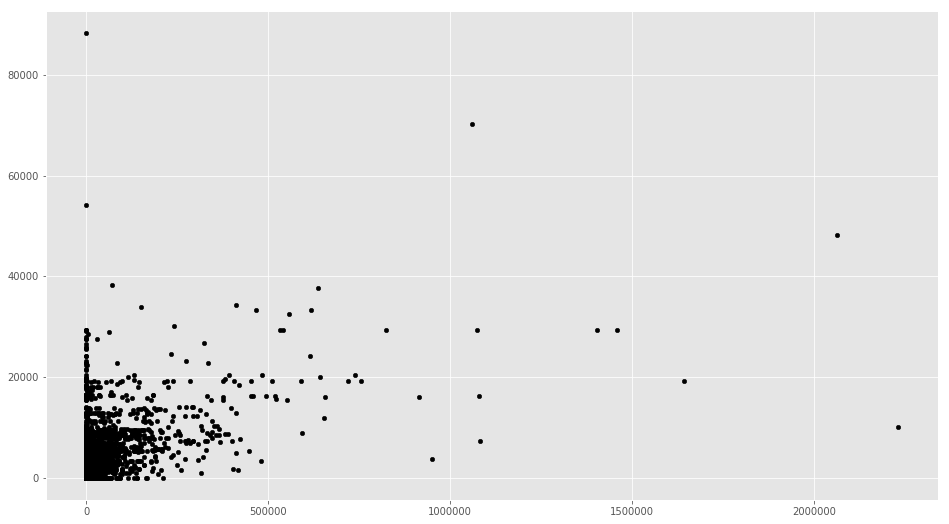

In [34]:
#validamos si graficamente se ve alguna correlacion 
x1 = data_financiera1['Deudas'].values
x2 = data_financiera1['INGRESO_BRUTO_FINAL'].values

#crea pares de valores por indice.
#Para el zip requisito que ambas listas tengan mismos tamaños
X = np.array(list(zip(x1,x2)))

#S es tamaño del punto
plt.scatter(x1, x2, c='black', s=20)

In [35]:
#Validamos con Spearman el grado de correlacion. (Se usa Spearman para no tener que validar normalidad en cada variable)
stats.spearmanr(x1, x2)

SpearmanrResult(correlation=0.51767541923387683, pvalue=0.0)

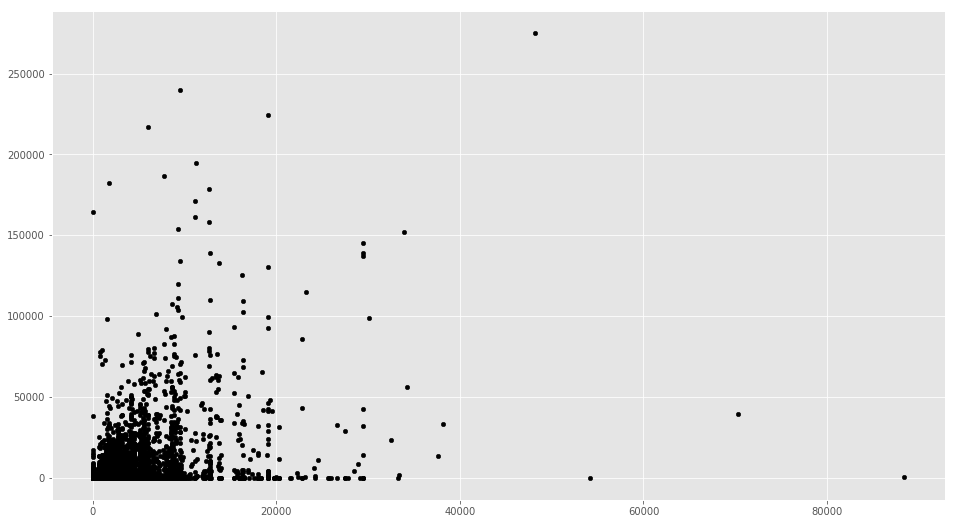

In [36]:
#Una de las solicitudes de la lectura es que como premisa general se compare el grado de relacion que existe en 
#cada producto desagregado con el ingreso.

#Hacemos los mismo que con deuda total, validamos graficamente y con Spearman.
tc1 = data_financiera1['INGRESO_BRUTO_FINAL'].values
tc2 = data_financiera1['SALDO_TC_SF_M1'].values
X = np.array(list(zip(x1,x2)))
plt.scatter(tc1, tc2, c='black', s=20)

In [37]:
stats.spearmanr(tc1, tc2)

SpearmanrResult(correlation=0.48197404950801775, pvalue=0.0)

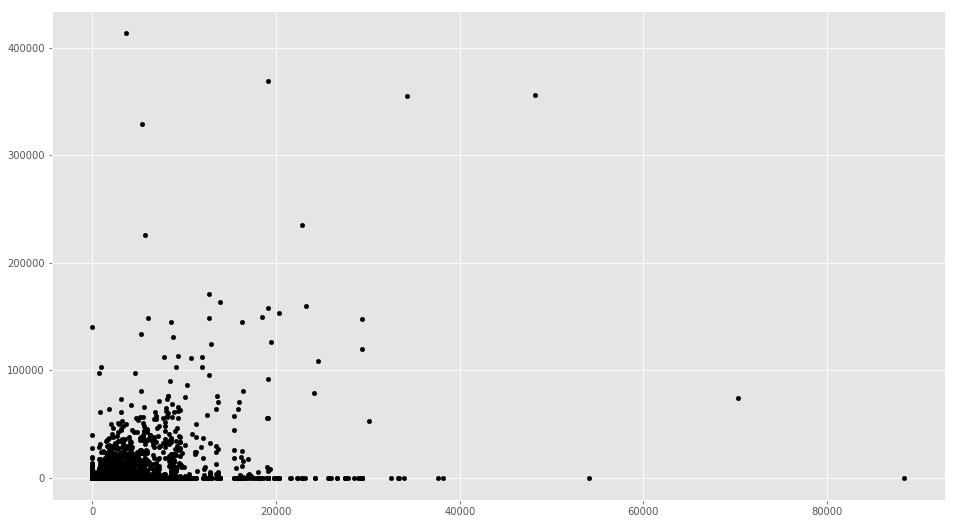

In [38]:
pp1 = data_financiera1['INGRESO_BRUTO_FINAL'].values
pp2 = data_financiera1['SALDO_PP_SF_M1'].values
X = np.array(list(zip(x1,x2)))
plt.scatter(pp1, pp2, c='black', s=20)

In [39]:
stats.spearmanr(pp1, pp2)

SpearmanrResult(correlation=0.23904867655504985, pvalue=3.49384990335936e-113)

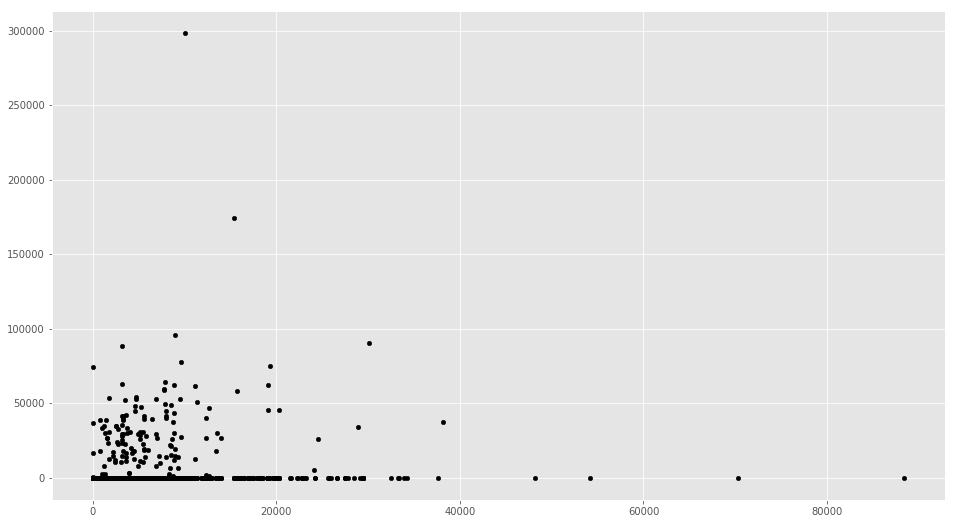

In [40]:
ve1 = data_financiera1['INGRESO_BRUTO_FINAL'].values
ve2 = data_financiera1['SALDO_VEH_SF_M1'].values
X = np.array(list(zip(x1,x2)))
plt.scatter(ve1, ve2, c='black', s=20)

In [41]:
stats.spearmanr(ve1, ve2)

SpearmanrResult(correlation=0.13802921449156647, pvalue=3.1622833302772646e-38)

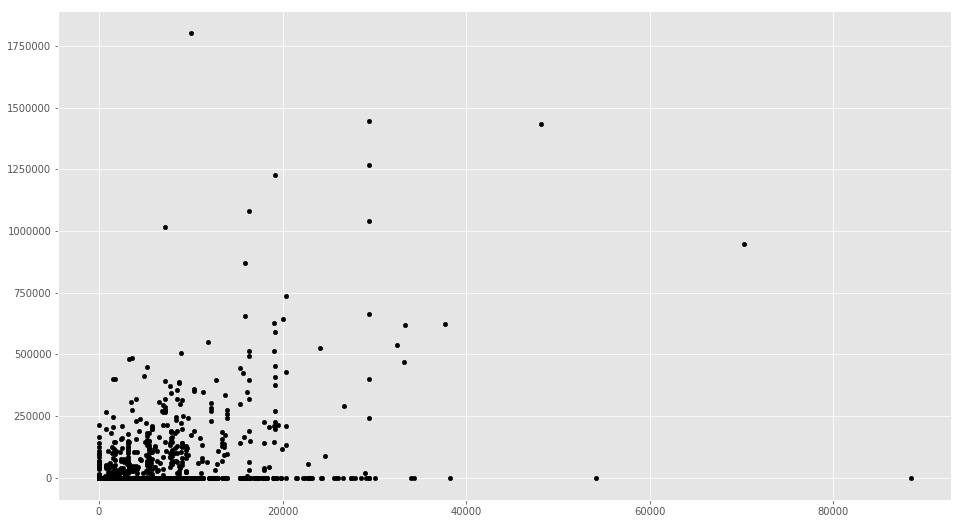

In [42]:
hi1 = data_financiera1['INGRESO_BRUTO_FINAL'].values
hi2 = data_financiera1['SALDO_HIP_SF_M1'].values
X = np.array(list(zip(x1,x2)))
plt.scatter(hi1, hi2, c='black', s=20)

In [43]:
stats.spearmanr(hi1, hi2)

SpearmanrResult(correlation=0.22813069419634061, pvalue=5.520775424097317e-103)

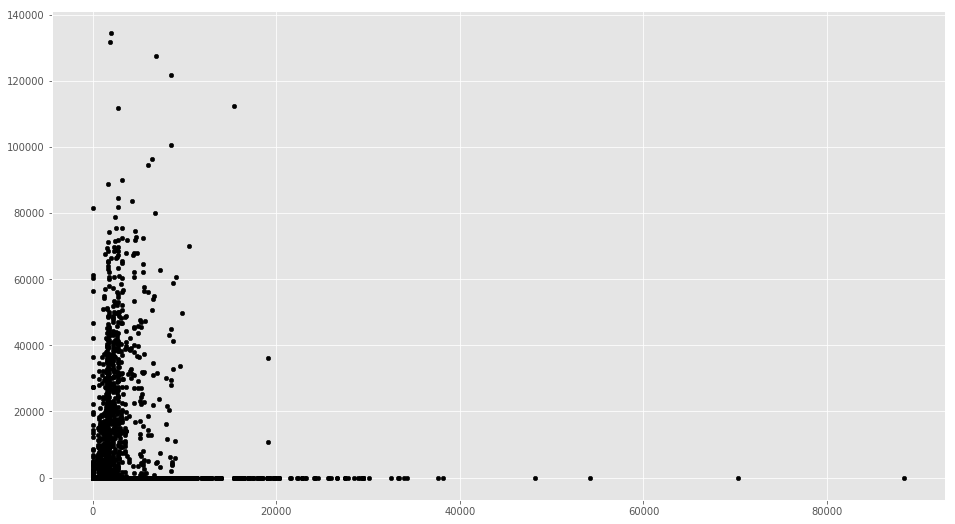

In [44]:
co1 = data_financiera1['INGRESO_BRUTO_FINAL'].values
co2 = data_financiera1['SALDO_CONV_SF_M1'].values
X = np.array(list(zip(x1,x2)))
plt.scatter(co1, co2, c='black', s=20)

In [45]:
stats.spearmanr(co1, co2)

SpearmanrResult(correlation=0.10378664962112449, pvalue=3.0202834327276632e-22)

In [46]:
#Resumiendo:

#Por los graficos se podria afirmar apriori que si existe correlacion entre cada producto y el ingreso.

#Por los estadisticos:
print (
'Resultados:','\n',
'Tarjeta credito:', stats.spearmanr(tc1, tc2),'\n',
'Prestamo personal:', stats.spearmanr(pp1, pp2),'\n',
'Prestamo vehicular:',stats.spearmanr(ve1, ve2),'\n',
'Prestamo hipotecario:',stats.spearmanr(hi1, hi2),'\n',
'Prestamo convenio:',stats.spearmanr(co1, co2))

Resultados: 
 Tarjeta credito: SpearmanrResult(correlation=0.48197404950801775, pvalue=0.0) 
 Prestamo personal: SpearmanrResult(correlation=0.23904867655504985, pvalue=3.49384990335936e-113) 
 Prestamo vehicular: SpearmanrResult(correlation=0.13802921449156647, pvalue=3.1622833302772646e-38) 
 Prestamo hipotecario: SpearmanrResult(correlation=0.22813069419634061, pvalue=5.520775424097317e-103) 
 Prestamo convenio: SpearmanrResult(correlation=0.10378664962112449, pvalue=3.0202834327276632e-22)


In [ ]:
#Conclusion 2:
#En la mayoria el p_valor es muy pequeño, por tanto si existe correlacion en el saldo de cada producto con los ingresos
#sin embargo el grado de correlacion varia en cada uno, siendo el mas grande TC con 0.48 
#y el mas pequeño prestamos por convenio con 0.1

<h1>Validaciones con condicion laboral</h1>

In [47]:
#Distribucion por condicion laboral:
data_financiera1['TIPO_CLIENTE'].value_counts()

INDEPENDIENTE    4784
DEPENDIENTE      3906
Name: TIPO_CLIENTE, dtype: int64

In [48]:
#Para validar si la condicion laboral incluye en la linea de credito, vemo como es la media en cada tipo de segmento:
data_financiera1[data_financiera1['TIPO_CLIENTE']=='INDEPENDIENTE']['LINEA_TC_SF_M1'].mean()

12056.925821488307

In [49]:
data_financiera1[data_financiera1['TIPO_CLIENTE']=='DEPENDIENTE']['LINEA_TC_SF_M1'].mean()

15304.926938044036

In [50]:
#Segun la media los dependientes tienen mas LINEA DE TC que los independiente.
#Para corroborar nuestra hipotesis usamos T TEST, que nos indican si las medias son iguales o no:

tc1 = data_financiera1[data_financiera1['TIPO_CLIENTE']=='INDEPENDIENTE']['LINEA_TC_SF_M1']
tc2 = data_financiera1[data_financiera1['TIPO_CLIENTE']=='DEPENDIENTE']['LINEA_TC_SF_M1']

# Use scipy.stats.ttest_ind.
t, p = ttest_ind(tc1, tc2, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = -4.42859  p = 9.60886e-06


In [ ]:
###Dado que el p_valor es pequeño, es correcto afirmar que las medias de Linea de credito son distintas 
#entre los dependientes e independientes

#Conclusion 3: Si existe relacion entre la condicion laboral y el la linea de TC.

In [51]:

#Hacemos mismo ejercicio con deudas y Edad:

data_financiera1[data_financiera1['TIPO_CLIENTE']=='INDEPENDIENTE']['Deudas'].mean()

11602.433563963223

In [52]:
data_financiera1[data_financiera1['TIPO_CLIENTE']=='DEPENDIENTE']['Deudas'].mean()

24384.5664900154

In [53]:
#Comparamos las medias para comprobar con T TEST

d1 = data_financiera1[data_financiera1['TIPO_CLIENTE']=='INDEPENDIENTE']['Deudas']
d2 = data_financiera1[data_financiera1['TIPO_CLIENTE']=='DEPENDIENTE']['Deudas']

# Use scipy.stats.ttest_ind.
t, p = ttest_ind(d1, d2, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = -7.9744  p = 1.80598e-15


In [ ]:
#Conclusion 4: si influye la condicion laboral en la deuda, los dependientes tienen mas deuda.

In [54]:
#Edad:
data_financiera1[data_financiera1['TIPO_CLIENTE']=='INDEPENDIENTE']['EDAD'].mean()

41.93896321070234

In [55]:
data_financiera1[data_financiera1['TIPO_CLIENTE']=='DEPENDIENTE']['EDAD'].mean()

42.136968766001026

In [56]:
#Comparamos las medias para comprobar con T TEST

e1 = data_financiera1[data_financiera1['TIPO_CLIENTE']=='INDEPENDIENTE']['EDAD']
e2 = data_financiera1[data_financiera1['TIPO_CLIENTE']=='DEPENDIENTE']['EDAD']

# Use scipy.stats.ttest_ind.
t, p = ttest_ind(e1, e2, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = -0.685696  p = 0.492924


In [ ]:
#eL P_VALOR es muy alto, no podemos rechazar que las medias de edades son iguales, es decir las medias de edad son iguales. 


#Conclusion 5: La edad no esta relacionada a la condicion laboral, el promedio en ambos casos aprox es 41 años.

<h1>Peruanos atipicos</h1>

In [57]:
#cargamos la funcion que identifica outliers por Z_SCORE
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [58]:
#INGRESOS:
Resultado = outliers_modified_z_score(data_financiera1['INGRESO_BRUTO_FINAL'])

In [59]:
#Cantidad de atipicos segun Z_SCORE
data_financiera1.iloc[Resultado[0]].shape

(644, 11)

In [60]:
#Visualizando atipicos:
data_financiera1.iloc[Resultado[0]].head()

,IDENTIFICADOR,INGRESO_BRUTO_FINAL,EDAD,TIPO_CLIENTE,LINEA_TC_SF_M1,SALDO_TC_SF_M1,SALDO_PP_SF_M1,SALDO_VEH_SF_M1,SALDO_HIP_SF_M1,SALDO_CONV_SF_M1,Deudas
9,9171307,8689.0,54,INDEPENDIENTE,0.00,0.00,0.0,0.00,0.00,3765.81,3765.81
20,8954232,8906.0,53,INDEPENDIENTE,159952.80,87704.74,0.0,0.00,505673.84,0.00,593378.58
67,9536060,7831.0,36,DEPENDIENTE,34466.16,12946.38,0.0,59565.00,0.00,0.00,72511.38
91,11629358,8513.0,39,DEPENDIENTE,39739.06,30450.11,0.0,15001.23,319996.25,0.00,365447.59
110,1202030,8080.0,41,DEPENDIENTE,70360.00,4715.06,0.0,0.00,0.00,0.00,4715.06


In [61]:
#cargamos la funcion que identifica outliers por rango Intercuartilico
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [62]:
Resultado = outliers_iqr(data_financiera1['INGRESO_BRUTO_FINAL'])

In [63]:
data_financiera1.iloc[Resultado].shape

(896, 11)

In [64]:
data_financiera1.iloc[Resultado].head()

,IDENTIFICADOR,INGRESO_BRUTO_FINAL,EDAD,TIPO_CLIENTE,LINEA_TC_SF_M1,SALDO_TC_SF_M1,SALDO_PP_SF_M1,SALDO_VEH_SF_M1,SALDO_HIP_SF_M1,SALDO_CONV_SF_M1,Deudas
9,9171307,8689.0,54,INDEPENDIENTE,0.00,0.00,0.00,0.0,0.00,3765.81,3765.81
20,8954232,8906.0,53,INDEPENDIENTE,159952.80,87704.74,0.00,0.0,505673.84,0.00,593378.58
40,9233120,6000.0,57,INDEPENDIENTE,128751.00,38814.06,2482.19,0.0,0.00,0.00,41296.25
42,12534833,7088.0,33,INDEPENDIENTE,1145.47,0.00,0.00,0.0,0.00,0.00,0.00
67,9536060,7831.0,36,DEPENDIENTE,34466.16,12946.38,0.00,59565.0,0.00,0.00,72511.38


In [ ]:
#Conclusion 6: Segun ambas funciones se identifican 896 atipicos por ingreso bruto